In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [ ]:
train_df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_df.drop('label', axis=1)
y = train_df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # fit_transform use to do some calculation and then do transformation
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model_linear.predict(X_test)

In [ ]:
from sklearn import metrics
acc= metrics.accuracy_score(y_test, y_pred)
print("accuracy:","{:.2f}".format(acc*100),"%")

accuracy: 91.46 %


In [ ]:
# non-linear model
# using rbf kernel, default value of gamma

rbf_model = SVC(kernel='rbf')  # specify model
rbf_model.fit(X_train, y_train) # Fit function is used to adjusts weights according to data values

SVC()

In [ ]:
# predict the value
y_rbf_pred = rbf_model.predict(X_test)

In [ ]:
# Accuracy
from sklearn import metrics
acc_rbf= metrics.accuracy_score(y_test, y_rbf_pred)
print("accuracy:","{:.2f}".format(acc_rbf*100),"%")

accuracy: 95.66 %


In [ ]:
print("Predictad Values :\n ",y_rbf_pred[10:15])
print ("Actual Values :\n",y_test[10:15])

Predictad Values :
  [3 9 6 7 1]
Actual Values :
 24273    3
32691    9
34526    6
11625    7
6614     1
Name: label, dtype: int64


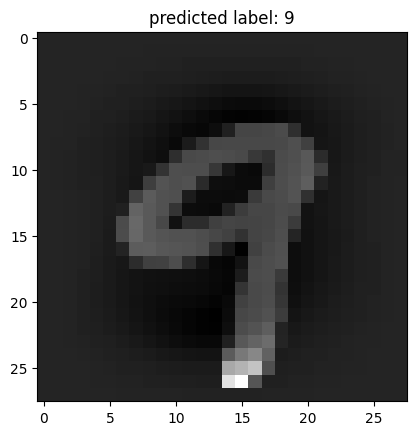

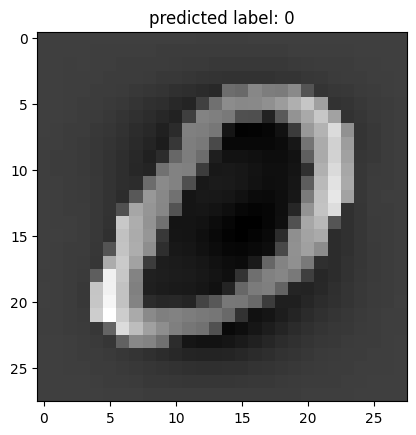

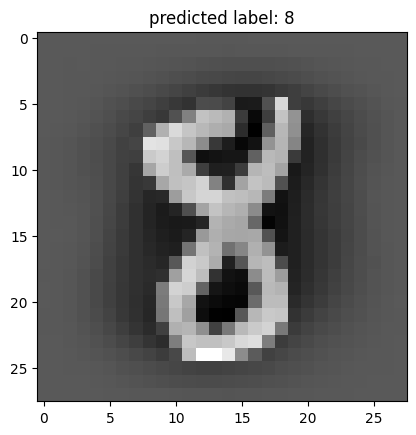

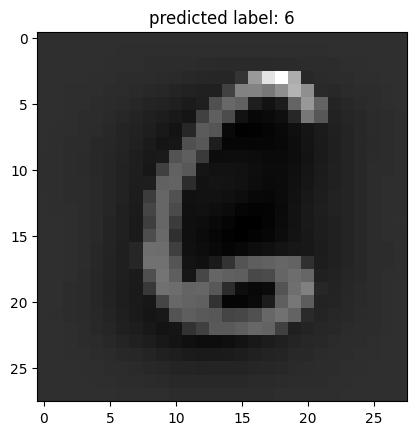

In [ ]:
for i in (np.random.randint(0,270,4)):          # pick the 4 random images with 0 to 270 range
    two_d = (np.reshape(X_test[i], (28, 28)))   # reshape the images in 28 X 28 array
    plt.title('predicted label: {0}'. format(y_rbf_pred[i]))  # give the title of the images
    plt.imshow(two_d, cmap='gray')            # show the images in gray scale
    plt.show()